## IMPORT LIBRARIES

In [1]:
import cv2
import os
import numpy as np
import time
import math
import apriltag
import pyrealsense2 as rs
from realworld_func.class_motionhelper import tracker, timer
from utils_real import *
from utils_track import tps_trans, get_tps_mat
from optical_flow import *
from run_snapbot_tps_opticalflow import *

print ("PACKAGES LOADED.")

PACKAGES LOADED.


## INSTANTIATE SNAPBOT

In [10]:
snapbot = xm430('SNAPBOT', USB_NUM=0)
snapbot.connect()
snapbot.IDX_LIST = [15,16,17,18,19,20,21,22]
snapbot.set_delaytime([30])
snapbot.set_pidgains(20, 0, 0)
snapbot.set_maxtorque([2000])
snapbot.set_goalspeed([1500])
snapbot.set_torque([1])

[SNAPBOT] INSTANTIATED AT [b'/dev/ttyUSB0']
[SNAPBOT] CONNECT
[PortHandler setup] The port number 0 has same device name... reinitialize port number 0!!
 SUCCEEDED TO OPEN THE PORT!
 SUCCEEDED TO CHANGE THE BAUDRATE!
COMMUNICATION SUCCESS
[SNAPBOT] DETECT ID
[SNAPBOT] [8]MOTORS DETECTED 
[SNAPBOT] ID_LIST:[[15, 16, 17, 18, 19, 20, 21, 22]]


## INITIALIZATION

In [11]:
snapbot.set_goalpos([2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048])
print (snapbot.get_currpos())
print ("INITIALIZE POSITION")

[2209 1694 2029 1690 2020 1677 2071 1627]
INITIALIZE POSITION


## JOINT TRAJECTORY

In [4]:
poses = np.load('qpos_dlpg/qpos_dlpg_17.npy')
run_snapbot(poses,snapbot,50,100)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [100.0sec].
FINISHED


## TPS

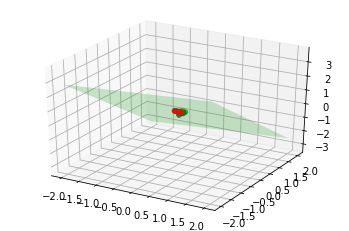

[[-3.34703572e-07 -1.85876070e-06]
 [-1.63906930e-06  1.66321352e-05]
 [ 3.43609963e-06 -1.78481569e-05]
 [-2.03014247e-06 -2.26072029e-06]
 [ 5.58532918e-07 -2.46162858e-06]
 [ 2.52334075e-07 -4.52509494e-06]
 [-1.55581802e-06  7.79940819e-06]
 [ 1.60413038e-06  1.05568051e-05]
 [ 1.07646745e-08  5.60050125e-07]
 [ 1.64798308e-08  3.20166890e-07]
 [ 1.19330309e-07 -3.38620703e-06]
 [-1.61486554e-07 -4.22648191e-06]
 [ 1.05241078e-07 -3.65577364e-07]
 [-1.20097425e-07  2.02757818e-07]
 [-3.84117165e-08  5.52776100e-07]
 [-2.23183875e-07  3.08528314e-07]
 [-3.82613041e-03  7.49313295e-01]
 [ 2.91694247e-04 -2.60437257e-04]
 [ 2.04099153e-04  1.28699729e-04]]


In [3]:
tps_coef = get_tps_mat()
print(tps_coef)

In [4]:
publish_xy(tps_coef, 50,50, VERBOSE = True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [50.0sec].
[INFO] [1664271631.839711]: 0.11970388525171627 0.03198415058586676
[INFO] [1664271631.925003]: 0.1262638682856292 0.03245554167457748
[INFO] [1664271631.999955]: 0.12647381255970647 0.03308648895389102
[INFO] [1664271632.075609]: 0.12718577611305648 0.03357162044296594
[INFO] [1664271632.150152]: 0.1279049979357283 0.03406014719944783
[INFO] [1664271632.225695]: 0.12780686772100802 0.03432223871942869
[INFO] [1664271632.304626]: 0.1281192514261198 0.034699593354597214
[INFO] [1664271632.381727]: 0.1288470581795329 0.03519490161965269
[INFO] [1664271632.463288]: 0.1288470581795329 0.03519490161965269
[INFO] [1664271632.541299]: 0.12916329861748965 0.03557597984638755
[INFO] [1664271632.654637]: 0.12876532764493465 0.036632837598746554
[INFO] [1664271632.731308]: 0.12866665599617333 0.036897200383686934
[INFO] [1664271632.836824]: 0.12866665599617333 0.036897200383686934
[INFO] [1664271632.943667]: 0.1287865034763469 0.037812841308286

In [13]:
qpos = np.load('qpos_dlpg/qpos_dlpg_17.npy')
run_snapbot_tps(qpos, tps_coef, snapbot, 50, 5, VERBOSE=False, ROS_publish = True)

NameError: name 'snapbot' is not defined

## 

## OPTICAL FLOW

In [13]:
snapbot_cam_idx = find_snapbotcamidx()
print(snapbot_cam_idx)

optical_flow(snapbot_cam_idx[-1])

[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video7): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video8): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video9): can't open camera by index


[0, 2, 4]
212.6836207243681


## JOINT TRAJECTORY + TPS + OPTICAL FLOW

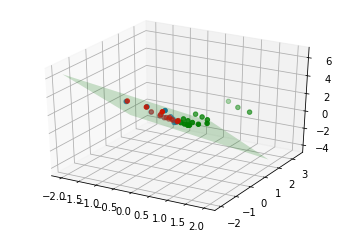

[[-3.9174911e-06  2.4857913e-05]
 [-4.4707353e-06 -1.3103939e-05]
 [ 3.7553011e-05  6.6076769e-05]
 [-2.0706080e-05 -4.8700156e-05]
 [-8.2339272e-07 -3.0592753e-05]
 [-6.7017427e-06 -1.3444553e-05]
 [-1.1239828e-05 -2.0673731e-05]
 [ 4.5513525e-06  1.6390313e-05]
 [ 9.5476730e-07  3.1684206e-06]
 [ 1.0854399e-06  7.4546338e-06]
 [ 3.9132265e-06  4.7143881e-06]
 [-2.9023199e-06 -6.0877442e-06]
 [ 1.4349265e-06 -1.1786016e-06]
 [-3.4957554e-07  2.7700992e-06]
 [-2.2996101e-06 -6.2348386e-06]
 [ 3.9180536e-06  1.4583784e-05]
 [ 1.1727651e+00  3.0176995e+00]
 [ 7.1866368e-04 -5.2523720e-03]
 [-1.1221399e-03 -5.5858544e-03]]


[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video3): can't open camera by index


[0, 2, 4]


[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video7): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video8): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video9): can't open camera by index


In [12]:
qpos = np.load('qpos_dlpg/qpos_dlpg_17.npy')

tps_coef = get_tps_mat()
print(tps_coef)

snapbot_cam_idx = find_snapbotcamidx()
print(snapbot_cam_idx)

In [18]:
run_snapbot_tps_opticalflow(qpos, tps_coef, snapbot, 50, 50, snapbot_cam_idx[-1], VERBOSE=True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [50.0sec].
sec_elps_diff:[324.9ms]
[2][0.3s] DELAYED! T:[20.0ms] BUT IT TOOK [324.9ms]
sec_elps_diff:[73.8ms]
[3][0.4s] DELAYED! T:[20.0ms] BUT IT TOOK [73.8ms]
sec_elps_diff:[83.9ms]
[4][0.5s] DELAYED! T:[20.0ms] BUT IT TOOK [83.9ms]
sec_elps_diff:[89.3ms]
[5][0.6s] DELAYED! T:[20.0ms] BUT IT TOOK [89.3ms]
sec_elps_diff:[78.5ms]
[6][0.7s] DELAYED! T:[20.0ms] BUT IT TOOK [78.5ms]
sec_elps_diff:[81.3ms]
[7][0.7s] DELAYED! T:[20.0ms] BUT IT TOOK [81.3ms]
sec_elps_diff:[79.7ms]
[8][0.8s] DELAYED! T:[20.0ms] BUT IT TOOK [79.7ms]
sec_elps_diff:[74.7ms]
[9][0.9s] DELAYED! T:[20.0ms] BUT IT TOOK [74.7ms]
sec_elps_diff:[72.5ms]
[10][1.0s] DELAYED! T:[20.0ms] BUT IT TOOK [72.5ms]
sec_elps_diff:[74.7ms]
[11][1.0s] DELAYED! T:[20.0ms] BUT IT TOOK [74.7ms]
sec_elps_diff:[102.9ms]
[12][1.1s] DELAYED! T:[20.0ms] BUT IT TOOK [102.9ms]
sec_elps_diff:[73.5ms]
[13][1.2s] DELAYED! T:[20.0ms] BUT IT TOOK [73.5ms]
sec_elps_diff:[73.1ms]
[14][1.3s] DELAYED! T:[20.0m

## CLOSE SNAPBOT

In [19]:
snapbot.set_torque([0])
snapbot.close()

[SNAPBOT] CLOSE
